# Exercise - Perceptron Logic Gate using Scikit-Learn

We will use perceptrons to model the fundamental building blocks of computers — logic gates.

![Perceptron](img/perceptron-7.png)

The table below shows the results of an AND gate. Given two inputs, an AND gate will output a 1 only if both inputs are a 1:

![Perceptron](img/perceptron-8.png)

 XOR gate — a gate that outputs a 1 only if one of the inputs is a 1:

![Perceptron](img/perceptron-9.png)

An AND gate can be thought of as linearly separable data and we can train a perceptron to perform AND.

An XOR gate isn't linearly separable and so a perceptron fails to learn XOR.

In [2]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

Think of an AND gate as a dataset of four points. The four points should be the four possible inputs to the AND gate. For example, the first point in the dataset should be [0, 0].

In [3]:
data = [[0,0], [0,1], [1,0], [1,1]]

Each data point should have a label associated with it. The label will be the result of the AND gate given the input. This should be a list where each label corresponds to a point in data.

In [10]:
and_labels = [0, 0, 0, 1]
xor_labels = [0, 1, 1, 0]
or_labels = [0, 1, 1, 1]

Plot these four points on a graph.

Call plt.scatter() using three parameters:

The first parameter should be a list of the x values of each point. You can get this using list comprehension — [point[0] for point in data].

The second parameter should be a list of the y values of each point. 

The third parameter should be c = labels. This will make the points with label 1 a different color than points with label 0.

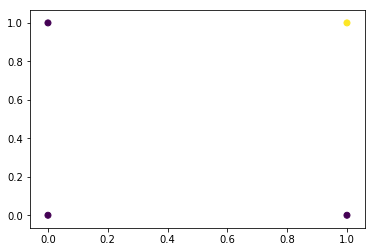

In [12]:
x = [point[0] for point in data]
y = [point[1] for point in data]

plt.scatter(x, y, c=and_labels)

The data is linearly separable because you can draw a line separating the yellow(1) dot from the black(0) dots, there is a clear boundary.

### Build the Perceptron

Build a perceptron to learn AND. Create a Perceptron object named classifier. For now, set the parameter `max_iter` to 40. `max_iter` sets the number of times the perceptron loops through the training data. The default is 1000,

In [13]:
classifier_and = Perceptron(max_iter=40)
print(type(classifier_and))

<class 'sklearn.linear_model.perceptron.Perceptron'>


In [15]:
# train the model
classifier_and.fit(data, and_labels)

# test the model's accuracy, did it learn AND
print(classifier.score(data, and_labels)) # 1.0 get correct answer 100% of the time

1.0


Your perceptron should have 100% accuracy, the perceptron preicts the correct answer 100% of the time.

Note that it is pretty unusual to train and test on the same dataset. In this case, since there are only four possible inputs to AND, we're stuck training on every possible input and testing on those same points.

Let's change the labels so your data now represents an XOR gate. The label should be a 1 only if one of the inputs is a 1. What is the accuracy of the perceptron now? Is the data linearly separable?

In [16]:
# build, train and test model's accuracy to predict XOR gate
classifier_xor = Perceptron(max_iter=40)
classifier_xor.fit(data, xor_labels)
print(classifier_xor.score(data, xor_labels)) # 0.5

0.5


A score of 50% means data not linearly seperable

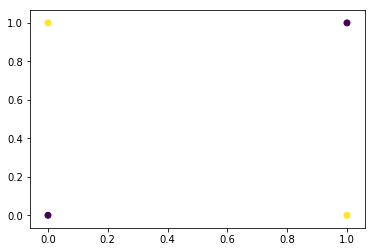

In [17]:
plt.scatter(x, y, c=xor_labels)

In [18]:
# build, train and test model's accuracy to predict OR gate
classifier_or = Perceptron(max_iter=40)
classifier_or.fit(data, or_labels)
print(classifier_or.score(data, or_labels))

1.0


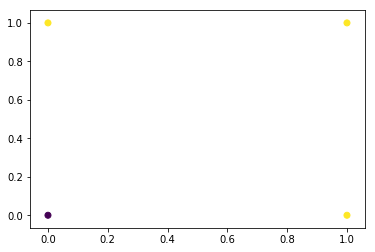

In [19]:
plt.scatter(x, y, c=or_labels)

Let's try to visualize what decision boundary the perceptron is making for the AND gate.

Given a list of points, the `.decision_function()` returns the distance those points are from the decision boundary. The closer the number is to 0, the closer that point is to the decision boundary.

In [20]:
# [-4.   1.  -1.5] distance each point is from the decision boundary - 
# 0.0 is the furthest point from the decision boundary
print(classifier_and.decision_function([[0, 0], [1, 1], [0.5, 0.5]]))

[-4.   1.  -1.5]


If we do this for a grid of points, we can make a heat map that reveals the decision boundary.
 
To begin, we need to create a list of the points we want to input to `.decision_function()`.

Create a list, `x_values` should be a list of 100 evenly spaced decimals between 0 and 1.

In [25]:
x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

We now want to find every possible combination of those x and y values using the `product` method.

In [27]:
point_grid = list(product(x_values, y_values)) # 10,000 points

Call classifier's `.decision_function()` method using point_grid as a parameter.

In [29]:
distances = classifier_and.decision_function(point_grid)
print(distance)

Right now distances stores positive and negative values. We only care about how far away a point is from the boundary, iterate through the list and take the absolute value of each distance.

In [30]:
abs_distances = [abs(distance) for distance in distances]

We're going to be using Matplotlib's `pcolormesh()` to plot a heat map of our distances.

Right now, `abs_distances` is a list of 10000 numbers. `pcolormesh()` needs a two dimensional list. We need to turn abs_distances into a 100 by 100 2D array.

We'll use Numpy's `reshape()` method to convert the distances list into a 100x100 2D array:

In [31]:
distances_matrix = np.reshape(abs_distances, (100, 100))
print(distances_matrix)

[[4.         3.97979798 3.95959596 ... 2.04040404 2.02020202 2.        ]
 [3.96969697 3.94949495 3.92929293 ... 2.01010101 1.98989899 1.96969697]
 [3.93939394 3.91919192 3.8989899  ... 1.97979798 1.95959596 1.93939394]
 ...
 [1.06060606 1.04040404 1.02020202 ... 0.8989899  0.91919192 0.93939394]
 [1.03030303 1.01010101 0.98989899 ... 0.92929293 0.94949495 0.96969697]
 [1.         0.97979798 0.95959596 ... 0.95959596 0.97979798 1.        ]]


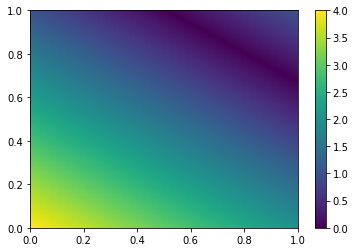

In [32]:
# draw the heat map
heatmap = plt.pcolormesh(x_values, y_values, distances_matrix)

# put a legend on the heat map
plt.colorbar(heatmap)

The heatmap is a  visualization of what the perceptron is doing. You should see a purple line where the distances are 0. That's the decision boundary!

Change your labels back to representing an OR gate. Where does the decision boundary go?

Change your labels to represent an XOR gate. Remember, this data is not linearly separable. Where does the decision boundary go?

Perceptrons can't solve problems that aren't linearly separable. However, if you combine multiple perceptrons together, you now have a neural net that can solve these problems!

This is incredibly similar to logic gates. AND gates and OR gates can't produce the output of XOR gates, but when you combine a few ANDs and ORs, you can make an XOR!